In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2]
y = iris.target
colors = "bry"

In [4]:
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

In [5]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02

In [6]:
clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)

In [7]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [8]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [9]:
Z = Z.reshape(xx.shape)

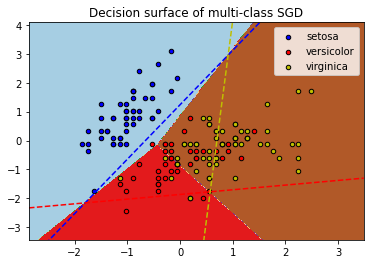

In [10]:
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()